In [2]:
import numpy as np
import pandas as pd 
from sklearn.datasets import make_classification
import random as random
import matplotlib.pyplot as plt

In [3]:
X,y = make_classification(n_features= 5,n_redundant = 0,n_informative = 5, n_clusters_per_class = 1)

In [4]:
df = pd.DataFrame(X,columns=['col1','col2','col3','col4','col5'])
df['target'] = y    
print(df.shape)
df.head()

(100, 6)


,col1,col2,col3,col4,col5,target
0,-0.481857,-2.429812,1.413321,-0.761503,0.551812,0
1,-0.118107,-1.545026,0.654768,-1.994468,1.295730,1
2,-1.887996,-0.488660,3.066509,-0.583929,0.469988,0
3,1.041465,-1.055146,0.376884,-1.111601,1.372631,1
4,-0.381276,-0.031595,1.337802,-0.812310,-0.720790,0


In [5]:
# function for row sampling

def sample_rows(df,percent):
  return df.sample(int(percent*df.shape[0]),replace=True)

In [6]:
# function for feature sampling
def sample_features(df,percent):
  cols = random.sample(df.columns.tolist()[:-1],int(percent*(df.shape[1]-1)))
  new_df = df[cols].copy()
  new_df['target'] = df['target'].values
  return new_df

In [7]:
# function for combined sampling

def combined_sampling(df,row_percent,col_percent):
  new_df = sample_rows(df,row_percent)
  return sample_features(new_df,col_percent)

In [8]:
df1 = combined_sampling(df,0.5,0.5)
df2 = combined_sampling(df,0.5,0.5)

df3 = combined_sampling(df,0.5,0.5)
     
print(df1.columns)
print(df2.columns)
print(df3.columns)

df3

Index(['col2', 'col5', 'target'], dtype='object')
Index(['col1', 'col4', 'target'], dtype='object')
Index(['col4', 'col5', 'target'], dtype='object')


,col4,col5,target
28,0.715866,1.090225,1
55,-0.926440,0.018681,1
22,-0.946666,2.584049,1
95,-1.991622,0.925981,1
35,1.378357,-0.865998,1
24,-0.364939,1.217338,0
52,-1.132040,0.689333,1
24,-0.364939,1.217338,0
90,-1.752686,2.636254,0
32,-1.654368,2.304407,0


In [9]:

from sklearn.tree import DecisionTreeClassifier
clf1 = DecisionTreeClassifier()
clf2 = DecisionTreeClassifier()
clf3 = DecisionTreeClassifier()

In [10]:

clf1.fit(df1.iloc[:,0:2],df1.iloc[:,-1])
clf2.fit(df2.iloc[:,0:2],df2.iloc[:,-1])
clf3.fit(df3.iloc[:,0:2],df3.iloc[:,-1])

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [11]:

from sklearn.tree import plot_tree

[Text(0.5357142857142857, 0.9545454545454546, 'x[1] <= 2.598\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.39285714285714285, 0.8636363636363636, 'x[0] <= -3.484\ngini = 0.483\nsamples = 44\nvalue = [18, 26]'),
 Text(0.4642857142857143, 0.9090909090909092, 'True  '),
 Text(0.32142857142857145, 0.7727272727272727, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.4642857142857143, 0.7727272727272727, 'x[0] <= -2.291\ngini = 0.472\nsamples = 42\nvalue = [16, 26]'),
 Text(0.39285714285714285, 0.6818181818181818, 'gini = 0.0\nsamples = 7\nvalue = [0, 7]'),
 Text(0.5357142857142857, 0.6818181818181818, 'x[1] <= 1.87\ngini = 0.496\nsamples = 35\nvalue = [16, 19]'),
 Text(0.4642857142857143, 0.5909090909090909, 'x[1] <= -0.86\ngini = 0.495\nsamples = 29\nvalue = [16, 13]'),
 Text(0.39285714285714285, 0.5, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5357142857142857, 0.5, 'x[0] <= 0.042\ngini = 0.5\nsamples = 26\nvalue = [13, 13]'),
 Text(0.35714285714285715, 0.40909090909

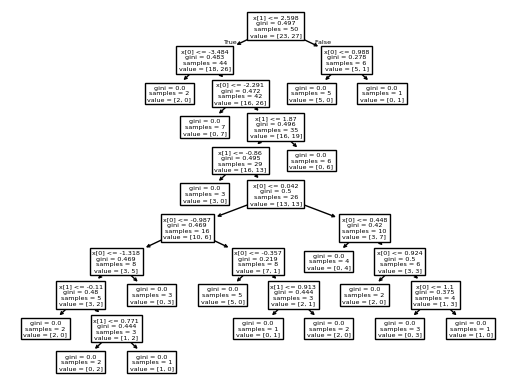

In [12]:
plot_tree(clf1)

[Text(0.6666666666666666, 0.875, 'x[0] <= 0.072\ngini = 0.497\nsamples = 50\nvalue = [23, 27]'),
 Text(0.5, 0.625, 'x[1] <= -1.462\ngini = 0.252\nsamples = 27\nvalue = [23, 4]'),
 Text(0.5833333333333333, 0.75, 'True  '),
 Text(0.3333333333333333, 0.375, 'x[0] <= -1.077\ngini = 0.49\nsamples = 7\nvalue = [3, 4]'),
 Text(0.16666666666666666, 0.125, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.5, 0.125, 'gini = 0.0\nsamples = 4\nvalue = [0, 4]'),
 Text(0.6666666666666666, 0.375, 'gini = 0.0\nsamples = 20\nvalue = [20, 0]'),
 Text(0.8333333333333334, 0.625, 'gini = 0.0\nsamples = 23\nvalue = [0, 23]'),
 Text(0.75, 0.75, '  False')]

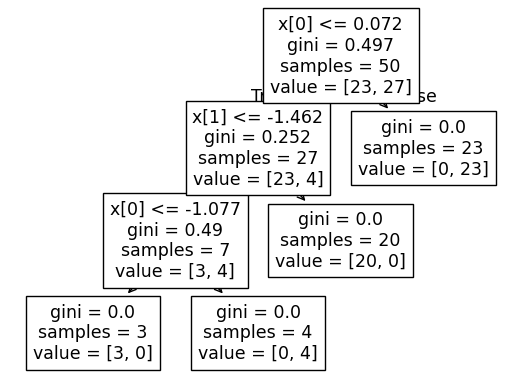

In [13]:
plot_tree(clf2)

[Text(0.5375, 0.9, 'x[0] <= -0.788\ngini = 0.5\nsamples = 50\nvalue = [25, 25]'),
 Text(0.325, 0.7, 'x[0] <= -1.46\ngini = 0.459\nsamples = 28\nvalue = [10, 18]'),
 Text(0.43125, 0.8, 'True  '),
 Text(0.2, 0.5, 'x[0] <= -1.977\ngini = 0.444\nsamples = 12\nvalue = [8, 4]'),
 Text(0.1, 0.3, 'x[0] <= -2.909\ngini = 0.375\nsamples = 4\nvalue = [1, 3]'),
 Text(0.05, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(0.15, 0.1, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(0.3, 0.3, 'x[1] <= 3.011\ngini = 0.219\nsamples = 8\nvalue = [7, 1]'),
 Text(0.25, 0.1, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.35, 0.1, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.45, 0.5, 'x[1] <= 2.598\ngini = 0.219\nsamples = 16\nvalue = [2, 14]'),
 Text(0.4, 0.3, 'gini = 0.0\nsamples = 14\nvalue = [0, 14]'),
 Text(0.5, 0.3, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.75, 0.7, 'x[0] <= 0.201\ngini = 0.434\nsamples = 22\nvalue = [15.0, 7.0]'),
 Text(0.64375, 0.8, '  False'),
 Text(0.6

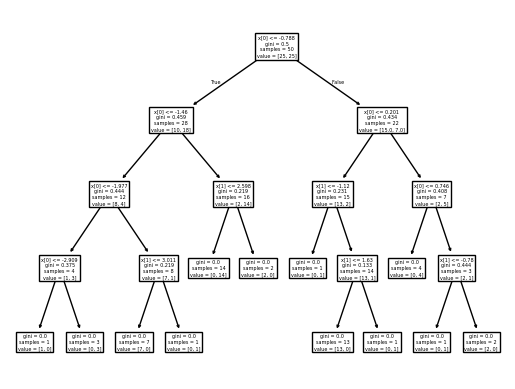

In [14]:

plot_tree(clf3)

In [15]:

clf1.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [16]:
clf2.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [17]:

clf3.predict(np.array([-1.042498,	-0.064323]).reshape(1,2))

c:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [19]:

df.sample(14,replace=True)

,col1,col2,col3,col4,col5,target
51,-1.323444,-0.045288,1.028075,-0.999357,1.006418,0
88,1.317520,-1.654891,-0.899729,-1.442002,2.548738,1
10,-0.610658,-0.545320,2.729186,-1.796340,1.737231,1
43,0.305512,-1.186509,1.828043,-1.747963,0.410721,1
39,0.163545,1.115570,2.347208,-0.949406,1.954951,1
97,-0.619377,-2.490664,1.721374,-2.080997,0.385692,1
27,1.956165,-4.134076,-2.097446,-1.172639,1.578320,1
58,1.773797,-2.032155,2.600792,0.652346,0.518688,1
10,-0.610658,-0.545320,2.729186,-1.796340,1.737231,1
17,-0.193358,-1.380774,0.051206,0.124767,1.095293,0


In [21]:
print(df.shape[1])
print(df.shape[0])

6
100
